## Xlwings

In [5]:
# install
# !pip install xlwings
# !pip install matplotlib
# !pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ce/cd/a7c2cbffe2afff975349e60b14b63a448162145a7acac8ba12ddc2ed78a8/pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---- -------------------------------- 41.0/341.8 kB 960.0 kB/s eta 0:00:01
     ------------ ------------------------- 112.6/341.8 kB 1.3 MB/s eta 0:00:01
     ------------------- ------------------ 174.1/341.8 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 286.7/341.8 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------------------------------------

In [1]:
import xlwings as xw
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
data = pd.DataFrame(data=np.random.rand(4,4)*100000,
index=["Q1","Q2","Q3","Q4"],
columns=["East","West","North","South"])
data.index.name = "Quaters"
data.columns.name = "Region"
data

Region,East,West,North,South
Quaters,,,,
Q1,85803.733534,25752.113383,14550.126972,65285.558804
Q2,10924.144639,12643.089894,38263.892126,12626.494808
Q3,59780.856127,55336.551112,85791.379958,77500.059610
Q4,19147.137704,76789.075711,65073.976951,79788.275886


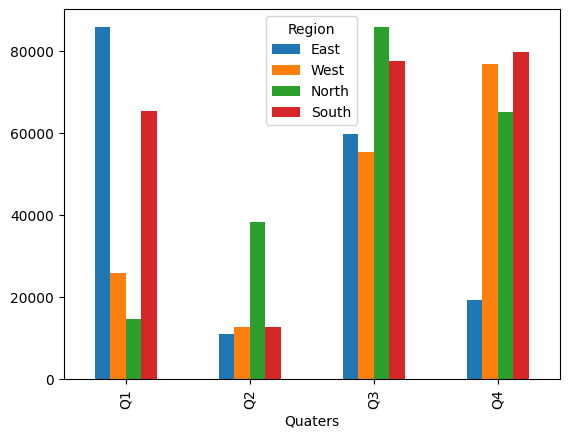

In [3]:
fig = data.plot.bar().get_figure()

In [5]:
template = xw.Book() #สร้างไฟล์เอ็กเซล
template = xw.Book()

app = xw.apps.active

sheet = template.sheets["Sheet1"] #สร้างชื่อชีท

sheet["A1"].value = "Import Data with Xlwings" #Input to cell A1
sheet["A1"].api.Font.Bold = True #font Bold
sheet["A1"].color = (70, 235, 52) # add color bg
sheet["A1"].font.color = (67, 52, 235) # add color font

sheet["A2"].value = "Import Data with Xlwings at A2" #Input to cell A2

sheet["A3"].value = data
sheet["C4"].value = "Import Data with Xlwings" #Input to cell C4

# add picture
plot = sheet.pictures.add(fig,top=sheet["B9"].top,left=sheet["B9"].left)
plot.width = plot.width*0.8
plot.height = plot.height*0.8

template.sheets.add("Sheet2")
sheet_2 = template.sheets["Sheet2"]
sheet_2["A1"].value = "Import data with Xlwings sheet2"

template.save(f"export\sample_xlwings.xlsx")
template.close()
app.kill()


## run with invisible

In [8]:
import xlwings as xw

app = xw.App(visible=False)
book = xw.Book()
sheet = book.sheets('Sheet1')
sheet["A1"].value = "Import data with Xlwings"
book.save(r"export\sample_with_invisible.xlsx")
book.close()
app.quit()

## run with template

In [9]:
import xlwings as xw

app = xw.App(visible=False)
book = xw.Book(r"D:\NMB-Traning_Python\src\data\xl_wing_template.xlsx") #part of template
sheet = book.sheets('Sheet1')
sheet["A1"].value = data
book.save(f"export\sample_with_template.xlsx")
book.close()
app.quit()